In [1]:
# !pip install -e /files/shared/ap/jupyter-notebook/pkgs/objFuncs --break-system-packages
# !pip install -e /files/shared/ap/jupyter-notebook/pkgs/pyBO --break-system-packages

In [2]:
# !pip install -e /files/shared/ap/jupyter-notebook/pkgs/objFuncs
# !pip install -e /files/shared/ap/jupyter-notebook/pkgs/pyBO

In [3]:
# !pip install -e ../../objFuncs
# !pip install -e ../../pyBO

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import concurrent

In [5]:
import objFuncs
from objFuncs import VM
from objFuncs import maximize_FC
from objFuncs.util import plot_obj_history, plot_time_val
from objFuncs import construct_machineIO

objFuncs version: 1.0.2. updated on 2024-03-07
flame_utils is not importable. ignoreing this feature...


In [6]:
from pyBO import pyBO
from pyBO.util import proximal_ordered_init_sampler

pyBO version: 1.0.1. updated on 2024-03-02


In [7]:
n_init = 32
evaluation_wait_time = 4

# construct VM

In [8]:
decision_CSETs = ['FE_LEBT:PSC2_D0948:I_CSET', 
                  'FE_LEBT:PSC1_D0948:I_CSET']
decision_min = [-2,-2, ]
decision_max = [ 2, 2, ]
objective_goal = { 
    'FE_MEBT:BPM_D1056:XPOS_RD' : 0.0,     #(mm)
    'FE_MEBT:BPM_D1056:YPOS_RD' : 0.0,     #(mm)
    'FE_MEBT:BCM_D1055:AVGPK_RD/FE_LEBT:BCM_D0989:AVGPK_RD': {'more than': 0.98},
    'FE_MEBT:FC_D1102:PKAVG_RD': {'more than': 10},
                   }
objective_weight = { 
    'FE_MEBT:BPM_D1056:XPOS_RD' : 1.,     
    'FE_MEBT:BPM_D1056:YPOS_RD' : 1.,     
    'FE_MEBT:BCM_D1055:AVGPK_RD/FE_LEBT:BCM_D0989:AVGPK_RD': 4,
    'FE_MEBT:FC_D1102:PKAVG_RD': 2,
    }
objective_norm = { 
    'FE_MEBT:BPM_D1056:XPOS_RD' : 1.,     
    'FE_MEBT:BPM_D1056:YPOS_RD' : 1.,     
    'FE_MEBT:BCM_D1055:AVGPK_RD/FE_LEBT:BCM_D0989:AVGPK_RD': 0.02,
    'FE_MEBT:FC_D1102:PKAVG_RD': 2,
    }

In [9]:
vm = VM(
        x0 = np.zeros(len(decision_CSETs)),
        decision_CSETs = decision_CSETs,
        decision_min = decision_min,
        decision_max = decision_max,
        objective_RDs = [ 
            'FE_MEBT:BPM_D1056:XPOS_RD',
            'FE_MEBT:BPM_D1056:YPOS_RD',
            'FE_MEBT:BCM_D1055:AVGPK_RD',
            'FE_LEBT:BCM_D0989:AVGPK_RD',
            'FE_MEBT:FC_D1102:PKAVG_RD',
            ],
        objective_RDs_mean = [1, -1, 6, 6, 6],
        objective_RDs_std  = [2,  2, 4, 4, 4],
        )

In [10]:
machineIO = construct_machineIO()
machineIO._ensure_set = vm.ensure_set
machineIO._fetch_data = vm.fetch_data
machineIO._caget      = vm.caget
machineIO._caput      = vm.caput
machineIO._test       = True
machineIO.view()

   _ensure_set_timeout : 30
   _ensure_set_timewait_after_ramp : 0.25
   _fetch_data_time_span : 2.05
   _return_obj_var : False
   _check_chopper_blocking : False
   _n_popup_ramping_not_OK : 0
   _verbose : False
   history : {}
   _test : True
   _ensure_set : <bound method VM.ensure_set of <objFuncs.vritual_machine.VM object at 0x00000158F807FBE0>>
   _fetch_data : <bound method VM.fetch_data of <objFuncs.vritual_machine.VM object at 0x00000158F807FBE0>>
   _caget : <bound method VM.caget of <objFuncs.vritual_machine.VM object at 0x00000158F807FBE0>>
   _caput : <bound method VM.caput of <objFuncs.vritual_machine.VM object at 0x00000158F807FBE0>>


In [11]:
obj = maximize_FC.maximize_FC1102(  
    decision_CSETs = decision_CSETs,
    decision_min = decision_min,
    decision_max = decision_max,
    objective_goal = objective_goal,
    objective_weight = objective_weight,
    objective_norm = objective_norm,
    objective_fill_none_by_init = True,
    machineIO = machineIO
    )

======== class info ========
init_time: 2024-03-12 13:53:28.892852
class_hierarchy: [
    maximize_FC1102, objFuncGoals, objFuncBase]
machineIO: not picklable
decision_CSETs: [
    FE_LEBT:PSC2_D0948:I_CSET, FE_LEBT:PSC1_D0948:I_CSET]
decision_min: [-2. -2.]
decision_max: [2. 2.]
decision_bounds: [[-2  2]
 [-2  2]]
decision_RDs: [
    FE_LEBT:PSC2_D0948:I_CSET, FE_LEBT:PSC1_D0948:I_CSET]
decision_tols: None
decision_couplings: None
history_buffer_size: None
logging_frequency: inf
logging_tag: FC1102
logging_fname: None
x0: [
    0.0, 0.0]
objective_weight:
    FE_MEBT:BPM_D1056:XPOS_RD: 0.125
    FE_MEBT:BPM_D1056:YPOS_RD: 0.125
    FE_MEBT:BCM_D1055:AVGPK_RD/FE_LEBT:BCM_D0989:AVGPK_RD: 0.5
    FE_MEBT:FC_D1102:PKAVG_RD: 0.25
objective_goal:
    FE_MEBT:BPM_D1056:XPOS_RD: 0.0
    FE_MEBT:BPM_D1056:YPOS_RD: 0.0
    FE_MEBT:BCM_D1055:AVGPK_RD/FE_LEBT:BCM_D0989:AVGPK_RD: {'more than': 0.98}
    FE_MEBT:FC_D1102:PKAVG_RD: {'more than': 10}
objective_norm:
    FE_MEBT:BPM_D1056:XPOS_RD: 1.0

In [12]:
plot_RDs = plot_time_val(history=machineIO.history,
                         keys = [['FE_MEBT:BPM_D1056:XPOS_RD','FE_MEBT:BPM_D1056:YPOS_RD'],
                                 ['FE_MEBT:FC_D1102:PKAVG_RD','FE_MEBT:BCM_D1055:AVGPK_RD','FE_LEBT:BCM_D0989:AVGPK_RD']
                                ])

plot_objs = plot_obj_history(
            obj.history['objectives'],
            keys=[  ['FE_MEBT:BPM_D1056:XPOS_RD','FE_MEBT:BPM_D1056:YPOS_RD'],
                    ['FE_MEBT:BCM_D1055:AVGPK_RD/FE_LEBT:BCM_D0989:AVGPK_RD'],
                    ['FE_MEBT:FC_D1102:PKAVG_RD'] ],
            add_y_data = obj.history['objectives']['total'],
            add_y_label = 'total obj'
            )

callbacks = [plot_RDs, plot_objs]


def obj_callbacks(x):
    time.sleep(evaluation_wait_time)
    return obj(x,callbacks=callbacks)

In [13]:
ndim = len(obj.decision_bounds)
bounds = obj.decision_bounds
x0 = np.random.rand(1,ndim)*(obj.decision_bounds[:,1]-obj.decision_bounds[:,0])+obj.decision_bounds[:,0]  # current set point
y0 = obj(x0)

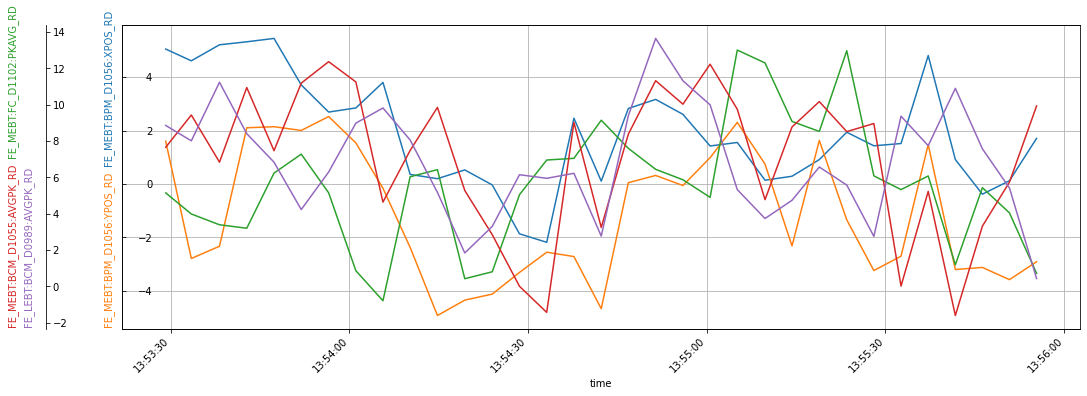

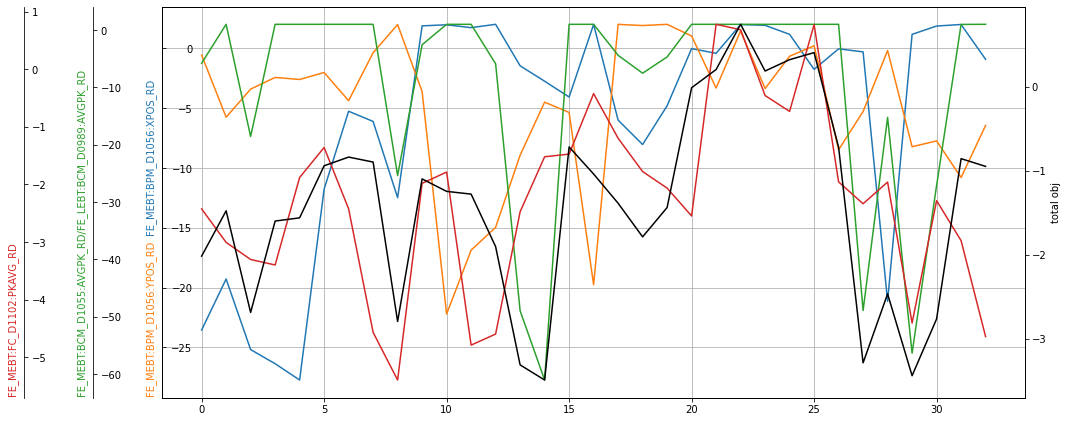

In [14]:
# fig, ax = plt.subplots(2,1,figsize=(15,14))
# hdisplay = display.display("",display_id=True)
train_x = proximal_ordered_init_sampler(n_init,bounds=obj.decision_bounds,x0=x0,ramping_rate=np.ones(ndim),polarity_change_time=10,method='sobol',seed=None)
train_y = np.array([obj_callbacks(x) for x in train_x])[:,None]
train_x = np.vstack((x0,train_x))
train_y = np.vstack((y0,train_y))

for f in callbacks:
    f.close()

# asynchronous BO

(-2.0, 2.0)

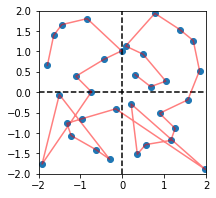

In [15]:
# check initial candidates are ordered to minimize ramping time including polarity change time
fig,ax=plt.subplots(figsize=(3,3))
ax.plot(train_x[:,0],train_x[:,1],alpha=0.5,c='r')
ax.scatter(train_x[:,0],train_x[:,1])
ax.hlines(0,bounds[0,0],bounds[0,1],ls='--',color='k')
ax.vlines(0,bounds[1,0],bounds[1,1],ls='--',color='k')
ax.set_xlim(bounds[0,0],bounds[0,1])
ax.set_ylim(bounds[1,0],bounds[1,1])

In [16]:
# model = GaussianProcess(matern52())
bo = pyBO.BO(
#             model = model,
            x = train_x, 
            y = train_y,
            bounds = bounds,
            acquisition_func = 'UpperConfidenceBound'  # = UCB
#             acquisition_func = 'ExpectedImprovement'  # = EI
         )

[████████████████████████████████████████] 100%/100%

[████████████████████████████████████████] 100%/100%



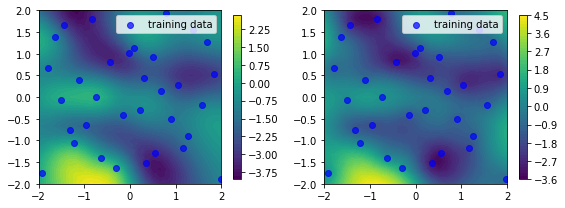

In [17]:
# plot initialized model with initial data. 
fig,ax = plt.subplots(1,2,figsize=(8,3))
bo.plot_model_2D_projection(project_maximum=True,fig=fig,ax=ax[0])
bo.plot_acquisition_2D_projection(project_maximum=True,fig=fig,ax=ax[1])
fig.tight_layout()

###### 1st query 

In [18]:
batch_size = 3
# w/o penalization  
# defult bounds is same as the most recent one
x1 = bo.query_candidates( batch_size = batch_size,
                          timeout = evaluation_wait_time*0.8
#                           X_pending = train_x[-1:,:],  # this is used to impose polarity change penality
                         )

def func_obj_serial(x):
    x = np.atleast_2d(x)
    y = np.zeros((len(x),1))
    for q in range(len(x)):
        y[q,:] = obj(x[q,:])
    return y

executor = concurrent.futures.ThreadPoolExecutor(max_workers=1)
y1_future = executor.submit(func_obj_serial,x1)  # asynchronous parallel objective evaluation

In [19]:
x1

array([[-0.91051633, -2.        ],
       [-0.39609286, -2.        ],
       [-1.55616673, -2.        ]])

[████████████████████████████████████████] 100%/100%

[████████████████████████████████████████] 100%/100%

[████████████████████████████████████████] 100%/100%



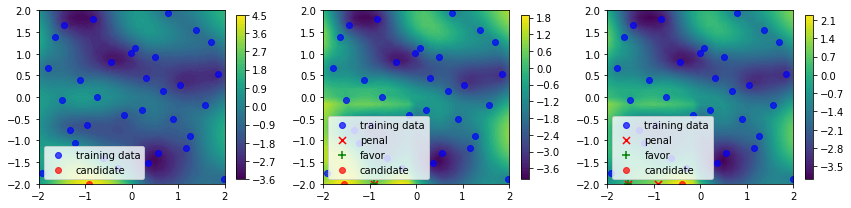

In [20]:
# check acuquisition functions
fig,ax = plt.subplots(1,batch_size,figsize=(4*batch_size,3))
if batch_size ==1:
    ax = [ax]
for i in range(batch_size):
    bo.plot_acquisition_2D_projection(project_maximum=True,i_query=i,fig=fig,ax=ax[i]);
    ax[i].legend()
fig.tight_layout()

###### 2nd query while evaluating 1st candidate

In [21]:
X_pending, Y_pending_future= bo.loop( 
                                n_loop=1,
                                func_obj = obj,
                                X_pending = x1, 
                                Y_pending_future = y1_future,
                                batch_size = batch_size,
                                timeout = evaluation_wait_time*0.8,
                                )

In [22]:
X_pending

array([[-1.1072621 , -2.        ],
       [-1.24561863, -2.        ],
       [-0.55475401, -2.        ]])

[████████████████████████████████████████] 100%/100%

[████████████████████████████████████████] 100%/100%

[████████████████████████████████████████] 100%/100%



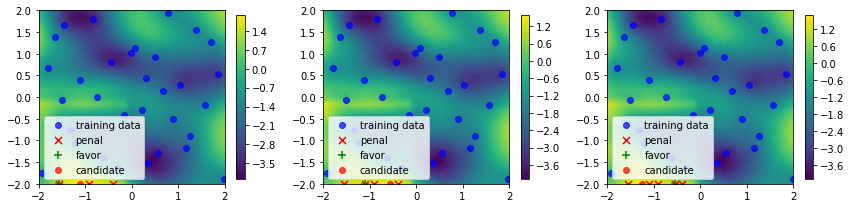

In [23]:
# check acuquisition functions
# epcoh needs to be -3 becuase loop update model with previous query and also make sure to complte most recent query
# since 1st query there is no update until evaluation, 2nd querry continued. So i_query starts from batch_size

fig,ax = plt.subplots(1,batch_size,figsize=(4*batch_size,3))
if batch_size ==1:
    ax = [ax]
for i in range(batch_size):
    bo.plot_acquisition_2D_projection(epoch=-2,i_query=i+batch_size,fig=fig,ax=ax[i]);
    ax[i].legend()
fig.tight_layout()

[████████████████████████████████████████] 100%/100%

[████████████████████████████████████████] 100%/100%

[████████████████████████████████████████] 100%/100%

[████████████████████████████████████████] 100%/100%

[████████████████████████████████████████] 100%/100%

[████████████████████████████████████████] 100%/100%

[████████████████████████████████████████] 100%/100%

[████████████████████████████████████████] 100%/100%

[████████████████████████████████████████] 100%/100%

[████████████████████████████████████████] 100%/100%

[████████████████████████████████████████] 100%/100%

[████████████████████████████████████████] 100%/100%



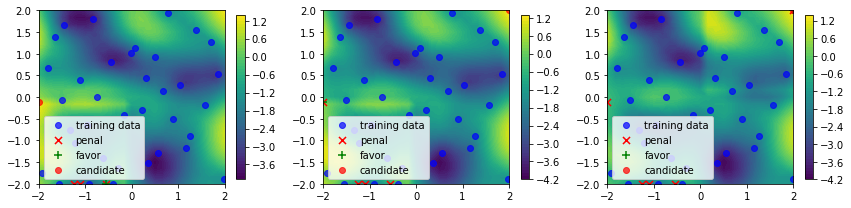

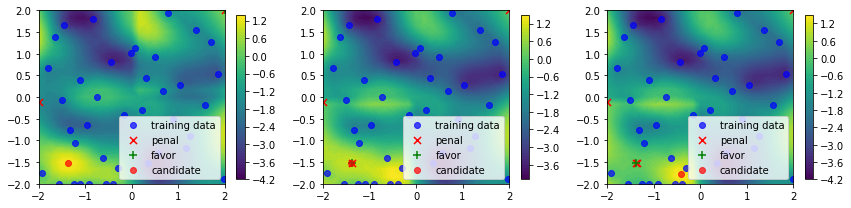

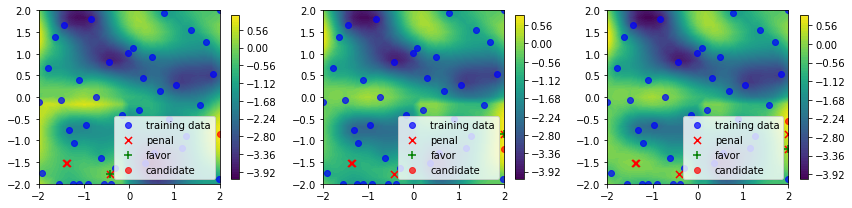

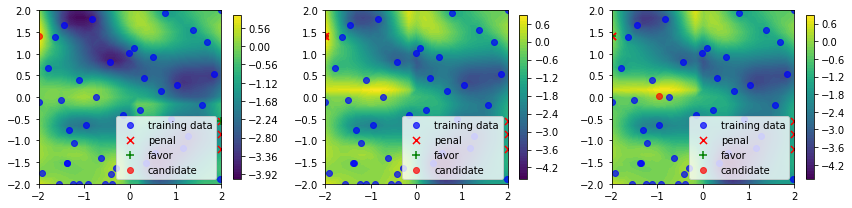

In [24]:
for i in range(4):
    X_pending, Y_pending_future= bo.loop( 
        n_loop=1,
        func_obj = obj,
        X_pending = X_pending, 
        Y_pending_future = Y_pending_future,
        batch_size = batch_size,
        timeout = evaluation_wait_time*0.8
        )
    # check acuquisition functions
    fig,ax = plt.subplots(1,batch_size,figsize=(4*batch_size,3))
    if batch_size ==1:
        ax = [ax]
    # epcoh needs to be -3 becuase loop update model with previous query and also make sure to complte most recent query
    for j in range(batch_size):
        bo.plot_acquisition_2D_projection(epoch=-2,project_maximum=True,i_query=j,fig=fig,ax=ax[j]);
        ax[j].legend()
    fig.tight_layout()

In [25]:
X_pending, Y_pending_future= bo.loop( 
    n_loop=8,
    func_obj = obj,
    X_pending = X_pending, 
    Y_pending_future = Y_pending_future,
    batch_size = batch_size,
    timeout = evaluation_wait_time*0.8
    )

bo.update_model(X_pending=X_pending,
                Y_pending_future = Y_pending_future)

[████████████████████████████████████████] 100%/100%



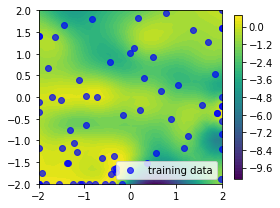

In [26]:
fig,ax = plt.subplots(figsize=(4,3))
bo.plot_model_2D_projection(project_maximum=True,fig=fig,ax=ax);
ax.legend()
fig.tight_layout()

In [27]:
# pyBO compuation time is more or less the objective evaluation time 
#   -- except the 1st query when there is no pending point 
#   -- and also when evaluation time is shoter than single optmization loop over acquisition function).
# pyBO stops query loop when objective evaulation is done.
print('t<125% \t t<150%')
for hist in bo.history:
    print(hist['model_fit_time']+np.sum(hist['query_time']) < batch_size*evaluation_wait_time*1.25,'\t', 
          hist['model_fit_time']+np.sum(hist['query_time']) < batch_size*evaluation_wait_time*1.5)

t<125% 	 t<150%
True 	 True
True 	 True
True 	 True
True 	 True
True 	 True
True 	 True
True 	 True
True 	 True
True 	 True
True 	 True
True 	 True
True 	 True
True 	 True
True 	 True
True 	 True


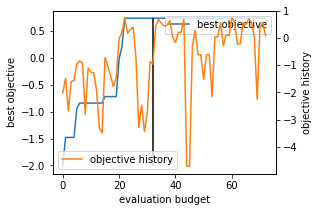

In [28]:
bo.plot_obj_history()
plt.vlines(n_init,min(bo.y),max(bo.y),color='k')

# load saved obj and contunue optimization

In [29]:
obj.save('test.pkl')
obj = objFuncs.objFuncGoals(load_from_file='test.pkl')
# obj.machineIO = vm
obj.machineIO = machineIO

In [30]:
x = np.array(obj.history['decision_CSETs']['values'])
y = np.array(obj.history['objectives']['total']).reshape(-1,1)
x.shape, y.shape

((73, 2), (73, 1))

In [31]:
plot_RDs = plot_time_val(history=machineIO.history,
                         keys = [['FE_MEBT:BPM_D1056:XPOS_RD','FE_MEBT:BPM_D1056:YPOS_RD'],
                                 ['FE_MEBT:FC_D1102:PKAVG_RD','FE_MEBT:BCM_D1055:AVGPK_RD','FE_LEBT:BCM_D0989:AVGPK_RD']
                                ])

plot_objs = plot_obj_history(
            obj.history['objectives'],
            keys=[  ['FE_MEBT:BPM_D1056:XPOS_RD','FE_MEBT:BPM_D1056:YPOS_RD'],
                    ['FE_MEBT:BCM_D1055:AVGPK_RD/FE_LEBT:BCM_D0989:AVGPK_RD'],
                    ['FE_MEBT:FC_D1102:PKAVG_RD'] ],
            add_y_data = obj.history['objectives']['total'],
            add_y_label = 'total obj'
            )

callbacks = [plot_RDs, plot_objs]


def obj_callbacks(x):
    time.sleep(evaluation_wait_time)
    return obj(x,callbacks=callbacks)

x data has duplicates. will remove duplicates and will average corresponding ys


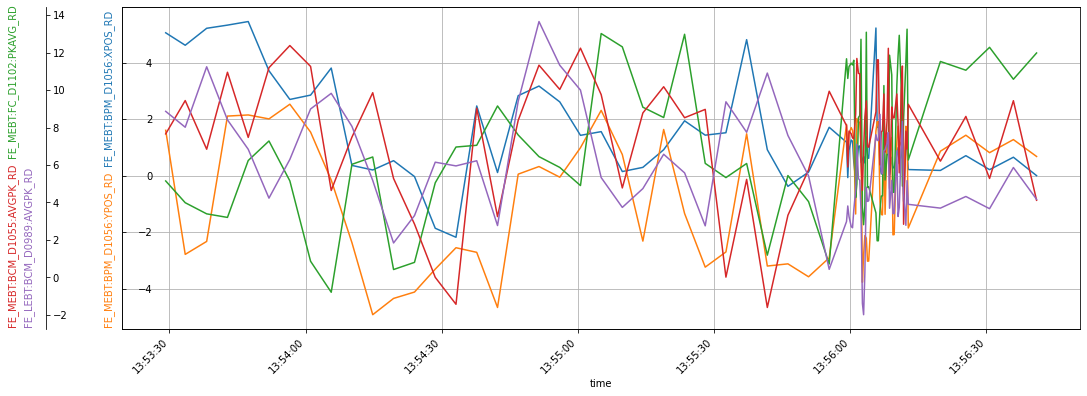

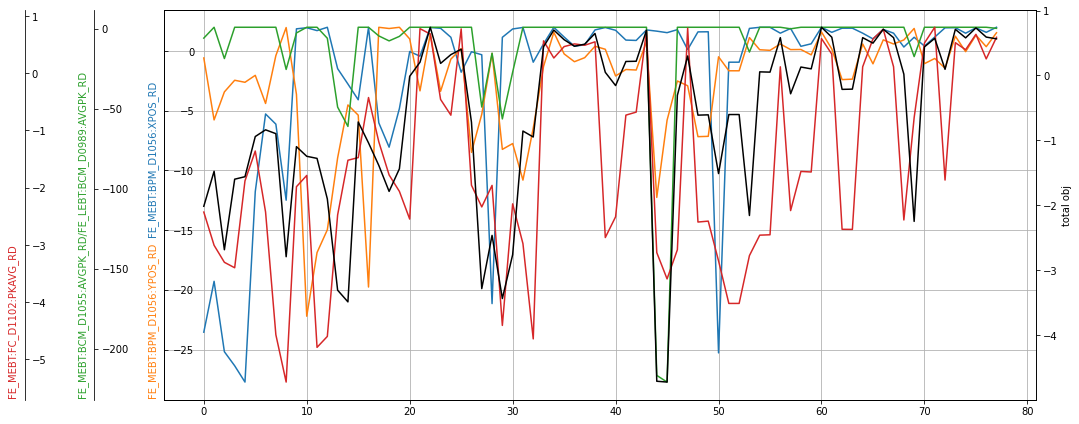

In [32]:
bo, X_pending, Y_pending_future = pyBO.runBO(obj_callbacks,
                                             bounds=obj.decision_bounds,
                                             n_init=1,
                                             budget=len(x)+4,
                                             x0 = x, 
                                             y0 = y
                                             )
for f in callbacks:
    f.close()

[████████████████████████████████████████] 100%/100%



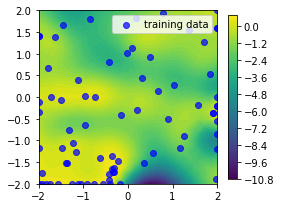

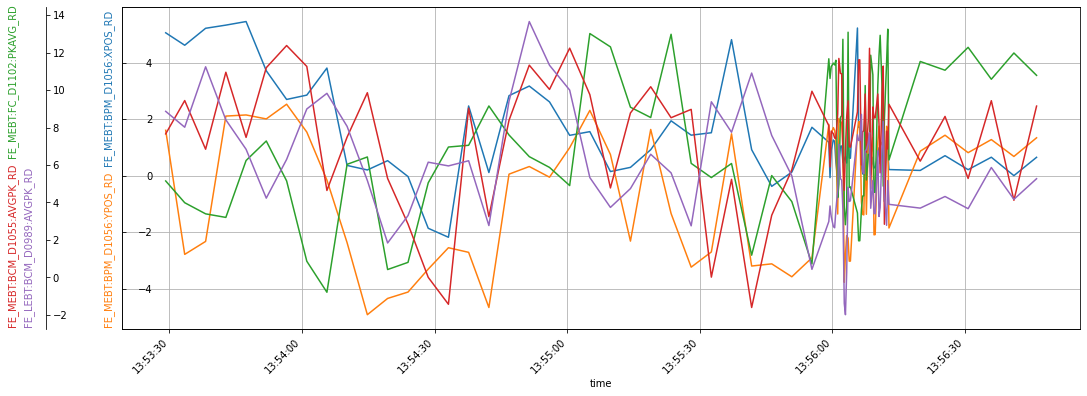

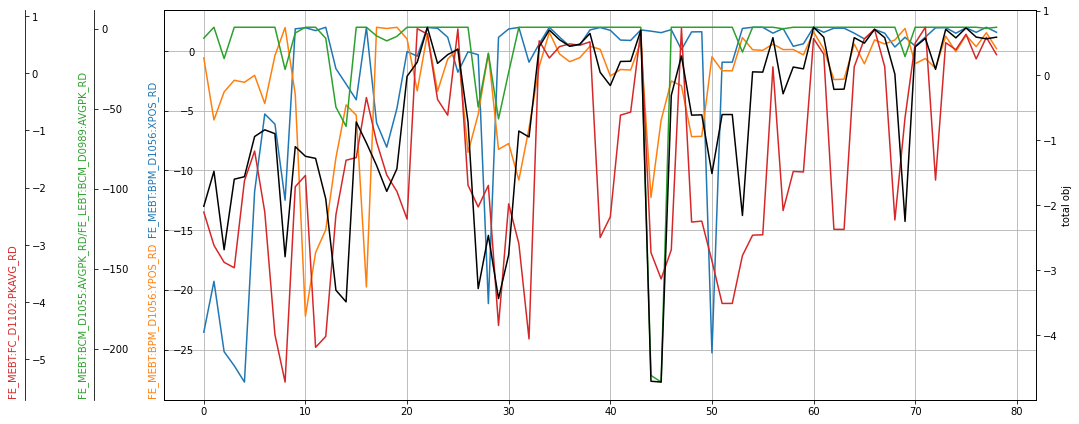

In [33]:
fig,ax = plt.subplots(figsize=(4,3))
bo.plot_model_2D_projection(project_maximum=True,fig=fig,ax=ax);
ax.legend()
fig.tight_layout()